In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from seaborn import heatmap
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.losses import categorical_crossentropy, sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [2]:
df_train = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_train.csv")
df_test = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_test.csv")

In [3]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_label = df_train['label']
test_label = df_test['label']

df_test = df_test.drop(columns = ['label'])
df_train = df_train.drop(columns = ['label'])

X_train, X_val, y_train, y_val = train_test_split(df_train, train_label, test_size = .3, stratify = train_label)

X_train = (X_train/255).values.reshape(len(X_train), 28,28,1)
X_val = (X_val/255).values.reshape(len(X_val), 28,28, 1)
X_test = (df_test/255).values.reshape(len(df_test), 28,28, 1)

In [5]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(42000, 28, 28, 1)
(18000, 28, 28, 1)
(10000, 28, 28, 1)


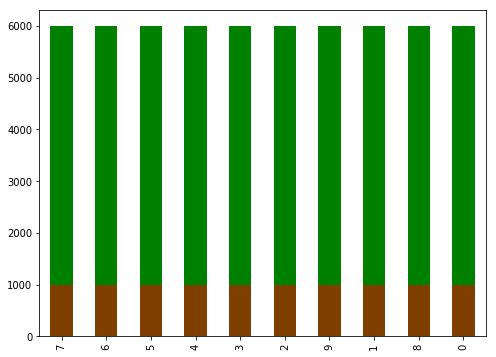

In [6]:
plt.figure(figsize = (8,6))
train_label.value_counts().plot(kind = 'bar', color = 'green')
test_label.value_counts().plot(kind = 'bar', color = 'red', alpha = .5)

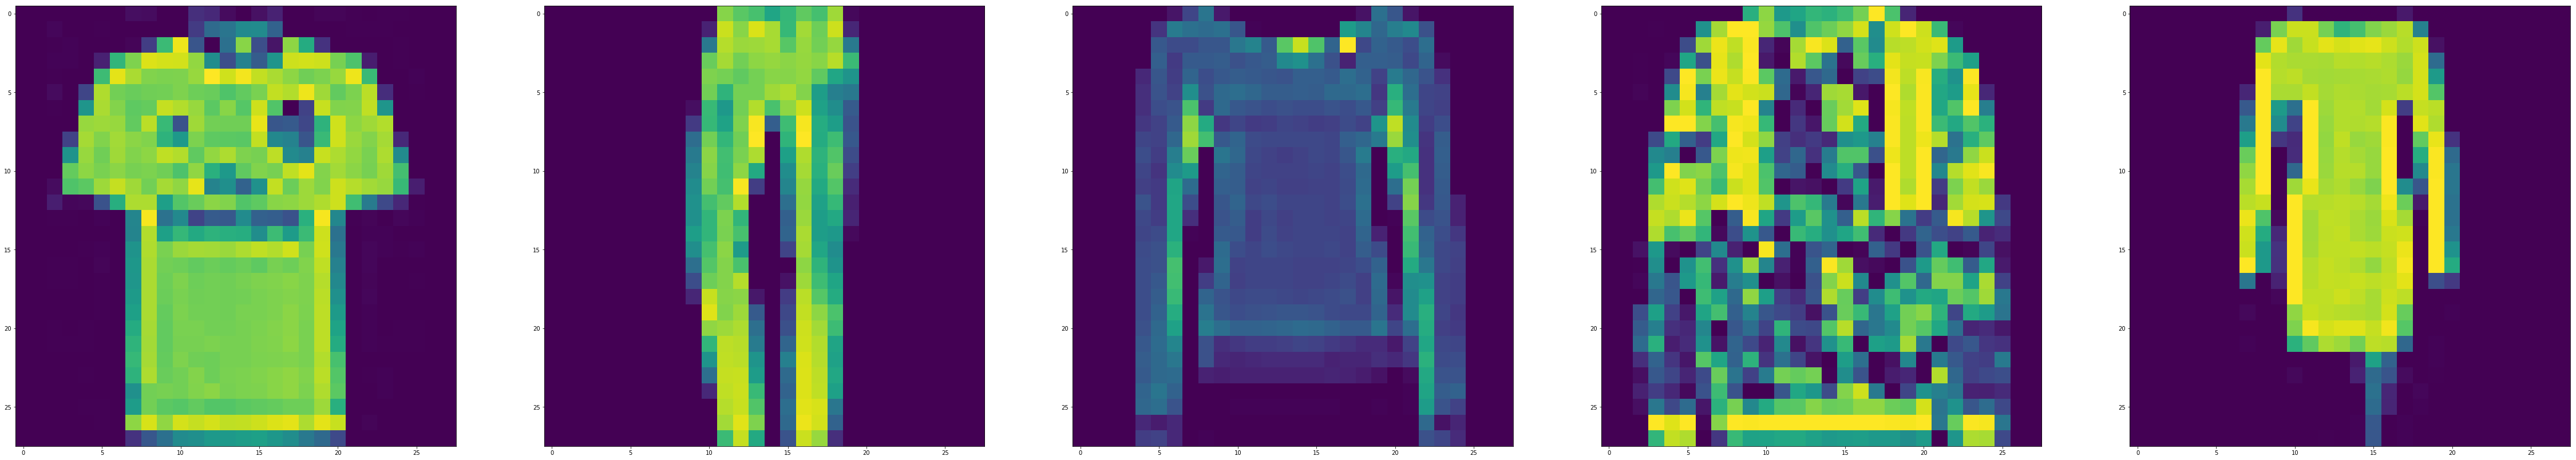

In [7]:
#plt.imshow(df_test.iloc[0, ""].values.reshape((28,28)))
#plt.imshow(df_test.iloc[1, :].values.reshape((28,28)))
#plt.imshow(df_test.iloc[2, :].values.reshape((28,28)))

f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(df_test.iloc[i, :].values.reshape(28, 28))
plt.show()

In [8]:
def Model():
    
    model = Sequential()

    #CCN1
    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same',activation = 'relu', input_shape = (28,28, 1)))
    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = (28,28, 1)))
    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same',activation = 'relu', input_shape = (28,28, 1)))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(.3))

    #CCN2
    model.add(Conv2D(filters = 128, padding = 'same', kernel_size = (2,2), activation = 'relu'))
    model.add(Conv2D(filters = 128, padding = 'same',kernel_size = (2,2), activation = 'relu'))
    model.add(Conv2D(filters = 128, padding = 'same',kernel_size = (2,2), activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(.25))

    #CCN3
    model.add(Conv2D(filters = 256, padding = 'same',kernel_size = (2,2), activation = 'relu'))
    model.add(Conv2D(filters = 256, padding = 'same',kernel_size = (2,2), activation = 'relu'))
    model.add(Conv2D(filters = 256, padding = 'same', kernel_size = (2,2), activation = 'relu'))
    
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(.25))
    
      #CCN3
    #model.add(Conv2D(filters = 512, kernel_size = (2,2), activation = 'relu'))
    #model.add(MaxPool2D(pool_size = (2,2)))
    #model.add(Dropout(.25))


    #Flatten
    model.add(Flatten())

    # Dense1
    model.add(Dense(1024,  activation = 'relu'))
    model.add(Dense(1024,  activation = 'relu'))
    model.add(Dropout(.2))

    # Dense2
    model.add(Dense(512,  activation = 'relu'))
    model.add(Dense(512,  activation = 'relu'))
    model.add(Dropout(.3))

    # Dense3
    model.add(Dense(128,  activation = 'relu'))
    model.add(Dropout(.3))

    # Dense4
    model.add(Dense(64,  activation = 'relu'))
    model.add(Dropout(.3))

    # Outpot
    model.add(Dense(10,  activation = 'softmax'))
    model.compile(optimizer = Adam(lr = .001), loss = sparse_categorical_crossentropy, metrics = ['accuracy'])
    
    return model

In [9]:
model = Model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       32896     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)       6

In [10]:
batch_size = 128

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', verbose = 0)
model_save =  ModelCheckpoint('model_weights.hdf5' , monitor = 'val_loss', save_best_only = True, mode = 'min')
reduce_lr =  ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=5, min_lr=0.00001)

history = model.fit(X_train, y_train, callbacks=[early_stopping, model_save, reduce_lr], 
          batch_size =batch_size, epochs = 50, validation_data = (X_val, y_val), verbose = 1  )


Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 15s 357us/sample - loss: 1.0839 - accuracy: 0.5811 - val_loss: 0.5286 - val_accuracy: 0.7827
Epoch 2/50
42000/42000 [==============================] - 9s 223us/sample - loss: 0.5693 - accuracy: 0.7887 - val_loss: 0.4466 - val_accuracy: 0.8428
Epoch 3/50
42000/42000 [==============================] - 9s 222us/sample - loss: 0.4564 - accuracy: 0.8465 - val_loss: 0.3474 - val_accuracy: 0.8793
Epoch 4/50
42000/42000 [==============================] - 9s 222us/sample - loss: 0.3999 - accuracy: 0.8654 - val_loss: 0.3063 - val_accuracy: 0.8925
Epoch 5/50
42000/42000 [==============================] - 9s 217us/sample - loss: 0.3572 - accuracy: 0.8784 - val_loss: 0.3270 - val_accuracy: 0.8878
Epoch 6/50
42000/42000 [==============================] - 9s 223us/sample - loss: 0.3458 - accuracy: 0.8813 - val_loss: 0.2818 - val_accuracy: 0.9006
Epoch 7/50
42000/42000 [=========================

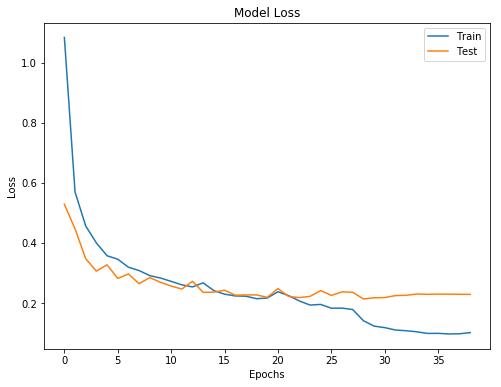

In [11]:
plt.figure(figsize = (8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

In [12]:
score_train = model.evaluate(X_train, y_train)
score_val = model.evaluate(X_val, y_val)

18000/18000 [==============================] - 3s 140us/sample - loss: 0.2287 - accuracy: 0.9334


In [13]:
print("Loss Train : {}  and  Accuracy Train : {}".format(score_train[0], score_train[1]))
print("Loss validate : {}  and  Accuracy Validate : {}".format(score_val[0], score_val[1]))

Loss Train : 0.06170737161216814  and  Accuracy Train : 0.977738082408905
Loss validate : 0.22868721302350362  and  Accuracy Validate : 0.933388888835907


In [14]:
y_predict = model.predict_classes(X_test)

In [15]:
y_predict

array([0, 1, 2, ..., 8, 8, 1])

In [16]:
CM = confusion_matrix(y_predict, test_label)
print(CM)

[[903   0  13  15   1   0  92   0   2   0]
 [  0 997   1   6   1   0   0   0   0   0]
 [ 20   0 896   2  25   0  38   0   1   0]
 [  9   2   8 950  18   0  22   0   1   0]
 [  0   0  42  14 914   0  37   0   1   0]
 [  0   0   0   0   0 983   0   2   0   1]
 [ 66   1  38  12  39   0 808   0   5   0]
 [  0   0   0   0   0  12   0 972   2  25]
 [  2   0   2   1   2   2   3   0 987   0]
 [  0   0   0   0   0   3   0  26   1 974]]


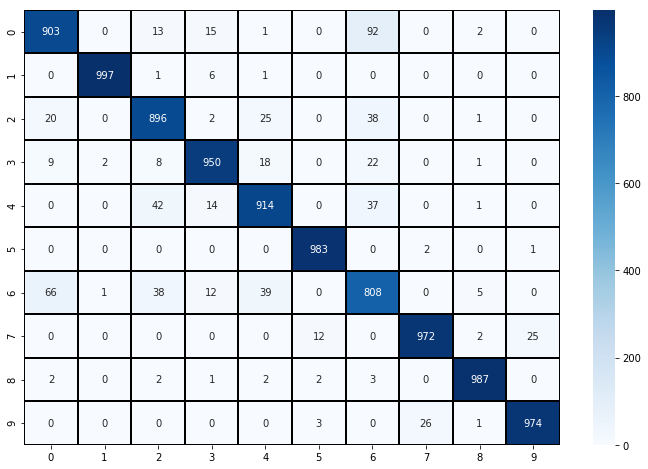

In [17]:
plt.figure(figsize = (12,8))
heatmap(CM, annot = True, cmap=plt.cm.Blues, fmt="d", linecolor ='black',  linewidths=1)

In [18]:
print("Prediction Accuracy:" )
print(accuracy_score(y_predict, test_label))

Prediction Accuracy:
0.9384
